# How has US Debt gotten so Big?

# MSPD



Monthly Statement of the Public Debt [MSPD] (https://fiscaldata.treasury.gov/static-data/MSPD_SumSecty_5_years.csv.zip) (USD)

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime

# Code

In [41]:
%matplotlib inline

In [42]:
plt.rcParams['figure.figsize'] = (10, 5)

In [43]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [44]:
if os.path.isfile("MSPD_SumSecty_20010131_20210731.csv"):
    filepath = "MSPD_SumSecty_20010131_20210731.csv"
    print("loading from file")
else:
    filepath = "https://fiscaldata.treasury.gov/static-data/MSPD_SumSecty_5_years.csv.zip"
    print("loading from the internet")

df = pd.read_csv(filepath)
print("done")

loading from file
done


In [45]:
# Definition of Terms
# Debt Held by Public - Federal Debt held by individuals, corporations, state or local governments, federal reserve banks, foreign governments and other entities outside of the United States Government
# Intragovernmental Holdings - Securities held by government trust funds, revolving funds and special funds.

# Bills - 4, 8, 13, 26, 52 week maturation rate sold at sub par rate, redeemed at full rate e.g sold @ $90, maturation rate 52 weeks buyback at $100, interest = 11%
# Notes - 2, 3, 5, 7 and 10 year maturation, interest paid every 6 months
# Bonds - 20, 30 year maturation - Interest every 6 months
# Treasury Inflation Protected Securities - Principal increases and deflates with CPI, when matured it pays adjusted or original principal whatever is greater. Interest twice a year at adjusted rate for inflation/deflation
# Floating Rate Note - Bond with a variable rate based on inflation, will perform better if market is volatile



In [46]:
df.head(15)

,Record_Date,Security_Type_Description,Security_Class_Description,Debt_Held_by_the_PublicM,Intragovernmental_HoldingsM,Total_Public_Debt_OutstandingM,Source_Line_Number,Fiscal_Year,Fiscal_Quarter_Number,Calendar_Year,Calendar_Quarter_Number,Calendar_Month_Number,Calendar_Day_Number
0,31/07/2021,Marketable,Bills,4140792,1334,4142127,1,2021,4,2021,3,7,31
1,31/07/2021,Marketable,Notes,12176507,8519,12185026,2,2021,4,2021,3,7,31
2,31/07/2021,Marketable,Bonds,3201102,6777,3207880,3,2021,4,2021,3,7,31
3,31/07/2021,Marketable,Treasury Inflation-Protected Securities,1603247,740,1603987,4,2021,4,2021,3,7,31
4,31/07/2021,Marketable,Floating Rate Notes,553383,86,553470,5,2021,4,2021,3,7,31
5,31/07/2021,Marketable,Federal Financing Bank,0,6053,6053,6,2021,4,2021,3,7,31
6,31/07/2021,Total Marketable,_,21675033,23509,21698542,7,2021,4,2021,3,7,31
7,31/07/2021,Nonmarketable,Domestic Series,44572,0,44572,8,2021,4,2021,3,7,31
8,31/07/2021,Nonmarketable,Foreign Series,264,0,264,9,2021,4,2021,3,7,31
9,31/07/2021,Nonmarketable,State and Local Government Series,135428,0,135428,10,2021,4,2021,3,7,31


In [47]:
df.columns

Index(['Record_Date', 'Security_Type_Description',
       'Security_Class_Description', 'Debt_Held_by_the_PublicM',
       'Intragovernmental_HoldingsM', 'Total_Public_Debt_OutstandingM',
       'Source_Line_Number', 'Fiscal_Year', 'Fiscal_Quarter_Number',
       'Calendar_Year', 'Calendar_Quarter_Number', 'Calendar_Month_Number',
       'Calendar_Day_Number'],
      dtype='object')

In [48]:
row_one = df.iloc[1]
row_one
#row_two = marketbills_data.iloc[2]
#row_two
#row_three = marketnotes_data.iloc[3]
#row_four = marketbonds_data.iloc[4]
#row_five = markettreasury_data.iloc[5]
#row_six = marketfloating_data.iloc[6]
#row_seven = marketfed_data.iloc[7]
#row_eight = markettotal_data.iloc[8]
#row_nine = nonmarkdomestic_data[9]
#row_ten = nonmarkforeign_data.iloc[10]
#row_eleven = nonmarkstatelocal_data[11]
#row_twelve = nonmarkussavings_data[12]
#row_thirteen = nonmarkgov_data.iloc[13]
#row_fourteen = nonmarkother_data.iloc[14]
#row_fifteen = totalnonmark_data.iloc[15]
#row_sixteen = totalpublic_data.iloc[16]

Record_Date                       31/07/2021
Security_Type_Description         Marketable
Security_Class_Description             Notes
Debt_Held_by_the_PublicM            12176507
Intragovernmental_HoldingsM             8519
Total_Public_Debt_OutstandingM      12185026
Source_Line_Number                         2
Fiscal_Year                             2021
Fiscal_Quarter_Number                      4
Calendar_Year                           2021
Calendar_Quarter_Number                    3
Calendar_Month_Number                      7
Calendar_Day_Number                       31
Name: 1, dtype: object

In [49]:
df['Record_Date']

0       31/07/2021
1       31/07/2021
2       31/07/2021
3       31/07/2021
4       31/07/2021
           ...    
3780    31/01/2001
3781    31/01/2001
3782    31/01/2001
3783    31/01/2001
3784    31/01/2001
Name: Record_Date, Length: 3785, dtype: object

In [50]:
df.shape #rows and Columns

(3785, 13)

In [51]:
df.info() #index, datatype and memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3785 entries, 0 to 3784
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Record_Date                     3785 non-null   object 
 1   Security_Type_Description       3785 non-null   object 
 2   Security_Class_Description      3785 non-null   object 
 3   Debt_Held_by_the_PublicM        3785 non-null   float64
 4   Intragovernmental_HoldingsM     3785 non-null   float64
 5   Total_Public_Debt_OutstandingM  3785 non-null   float64
 6   Source_Line_Number              3785 non-null   int64  
 7   Fiscal_Year                     3785 non-null   int64  
 8   Fiscal_Quarter_Number           3785 non-null   int64  
 9   Calendar_Year                   3785 non-null   int64  
 10  Calendar_Quarter_Number         3785 non-null   int64  
 11  Calendar_Month_Number           3785 non-null   int64  
 12  Calendar_Day_Number             37

In [52]:
df.describe()

,Debt_Held_by_the_PublicM,Intragovernmental_HoldingsM,Total_Public_Debt_OutstandingM,Source_Line_Number,Fiscal_Year,Fiscal_Quarter_Number,Calendar_Year,Calendar_Quarter_Number,Calendar_Month_Number,Calendar_Day_Number
count,3785,3785,3785,3785,3785,3785,3785,3785,3785,3785
mean,1930525,869740,2800265,8,2011,3,2011,2,6,30
std,3900789,1824207,4695604,4,6,1,6,1,3,1
min,0,0,0,1,2001,1,2001,1,1,28
25%,25473,0,29995,4,2006,2,2006,1,3,30
50%,204539,310,498502,8,2011,3,2011,2,6,31
75%,1511028,15500,4070686,12,2016,3,2016,3,9,31
max,22329823,6199613,28529436,16,2021,4,2021,4,12,31


In [116]:
ax = 

In [53]:
df.iloc[0,2]

'Bills'

In [54]:
df.sort_values(['Record_Date'], ascending=False)

,Record_Date,Security_Type_Description,Security_Class_Description,Debt_Held_by_the_PublicM,Intragovernmental_HoldingsM,Total_Public_Debt_OutstandingM,Source_Line_Number,Fiscal_Year,Fiscal_Quarter_Number,Calendar_Year,Calendar_Quarter_Number,Calendar_Month_Number,Calendar_Day_Number
107,31/12/2020,Marketable,Federal Financing Bank,0,7262,7262,6,2021,1,2020,4,12,31
105,31/12/2020,Marketable,Treasury Inflation-Protected Securities,1578599,671,1579270,4,2021,1,2020,4,12,31
108,31/12/2020,Marketable,Bills,4963056,1084,4964140,1,2021,1,2020,4,12,31
109,31/12/2020,Marketable,Notes,11084744,7180,11091924,2,2021,1,2020,4,12,31
110,31/12/2020,Marketable,Bonds,2833625,5668,2839293,3,2021,1,2020,4,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,28/02/2001,Total Marketable,_,2973797,15460,2989258,7,2001,2,2001,1,2,28
3758,28/02/2001,Marketable,Federal Financing Bank,0,15000,15000,6,2001,2,2001,1,2,28
3757,28/02/2001,Marketable,Inflation-Indexed Bonds,38958,0,38958,5,2001,2,2001,1,2,28
3756,28/02/2001,Marketable,Inflation-Indexed Notes,88267,0,88267,4,2001,2,2001,1,2,28


In [55]:
df.groupby(['Source_Line_Number'])

In [56]:
df = pd.read_csv("MSPD_SumSecty_all_years.csv", parse_dates=['Record_Date'], dayfirst=True)
 #convert the date column to a time scale, in the DD/MM/YYYY format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Record_Date                     3755 non-null   datetime64[ns]
 1   Security_Type_Description       3755 non-null   object        
 2   Security_Class_Description      3755 non-null   object        
 3   Debt_Held_by_the_PublicM        3755 non-null   float64       
 4   Intragovernmental_HoldingsM     3755 non-null   float64       
 5   Total_Public_Debt_OutstandingM  3755 non-null   float64       
 6   Source_Line_Number              3755 non-null   int64         
 7   Fiscal_Year                     3755 non-null   int64         
 8   Fiscal_Quarter_Number           3755 non-null   int64         
 9   Calendar_Year                   3755 non-null   int64         
 10  Calendar_Quarter_Number         3755 non-null   int64         
 11  Cale

In [57]:
df["Record_Date"].min(), df["Record_Date"].max() #checking dataframe


(Timestamp('2001-01-31 00:00:00'), Timestamp('2021-05-31 00:00:00'))

In [58]:
df["Record_Date"].max() - df["Record_Date"].min() #checking timescale

Timedelta('7425 days 00:00:00')

In [59]:
dti = pd.to_datetime(["31/01/2001", np.datetime64('2001-01-31'), datetime.datetime(2001, 1, 31)])
dti
start = df["Record_Date"].min()
end = df["Record_Date"].max() # creating date time index

In [60]:
rng = pd.date_range(start = df["Record_Date"].min(), end = df["Record_Date"].max(), freq='M') #date range in months

TPDO = df.loc[df["Source_Line_Number"] == 7, "Total_Public_Debt_OutstandingM"] #locate each "Source Line 7" cell which is "Total Marketable Debt" and the Number in the "Total Public Debt Outstanding" = Total Public Marketable Debt per quarter sourced

ts = pd.Series((TPDO), index=rng) #Create an index timescale of each quarter, based on the range of dates available at the min and max

pd.options.display.float_format = '{:.0f}'.format #reformat the display of numbers to get solid, non decimal displays

In [61]:
TPDO #viewing TPDO in 

6      21421327
21     21456854
36     21388100
51     21158520
66     21048965
         ...   
3681    2855417
3697    2877872
3713    3017869
3729    2989258
3745    2977328
Name: Total_Public_Debt_OutstandingM, Length: 245, dtype: float64

In [62]:
TPDO.min()
TPDO.max()
rngTPDO =  TPDO.max() - TPDO.min()

In [63]:
ts

2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
              ..
2021-01-31   NaN
2021-02-28   NaN
2021-03-31   NaN
2021-04-30   NaN
2021-05-31   NaN
Freq: M, Name: Total_Public_Debt_OutstandingM, Length: 245, dtype: float64

In [64]:
rng

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31'],
              dtype='datetime64[ns]', length=245, freq='M')

In [65]:
dti

DatetimeIndex(['2001-01-31', '2001-01-31', '2001-01-31'], dtype='datetime64[ns]', freq=None)

In [66]:
debt_df = pd.read_csv("MSPD_SumSecty_all_years.csv", parse_dates=['Record_Date'], dayfirst=True) #index dates
debt_three = debt_df[['Record_Date', 'Security_Type_Description', 'Total_Public_Debt_OutstandingM']] #select 3 columns
select_marketable = debt_three.loc[debt_three['Security_Type_Description']=='Total Marketable'] #select the rows that contain 'Total Marketable'
select_marketable

,Record_Date,Security_Type_Description,Total_Public_Debt_OutstandingM
6,2021-05-31,Total Marketable,21421327
21,2021-04-30,Total Marketable,21456854
36,2021-03-31,Total Marketable,21388100
51,2021-02-28,Total Marketable,21158520
66,2021-01-31,Total Marketable,21048965
...,...,...,...
3681,2001-05-31,Total Marketable,2855417
3697,2001-04-30,Total Marketable,2877872
3713,2001-03-31,Total Marketable,3017869
3729,2001-02-28,Total Marketable,2989258


In [67]:
debt_three.head(10)

,Record_Date,Security_Type_Description,Total_Public_Debt_OutstandingM
0,2021-05-31,Marketable,4377078
1,2021-05-31,Marketable,11830355
2,2021-05-31,Marketable,3093839
3,2021-05-31,Marketable,1585324
4,2021-05-31,Marketable,527469
5,2021-05-31,Marketable,7262
6,2021-05-31,Total Marketable,21421327
7,2021-05-31,Nonmarketable,53075
8,2021-05-31,Nonmarketable,264
9,2021-05-31,Nonmarketable,125339


Text(0.5, 1.0, 'Total Public Debt Outstanding in Millions per Quarter')

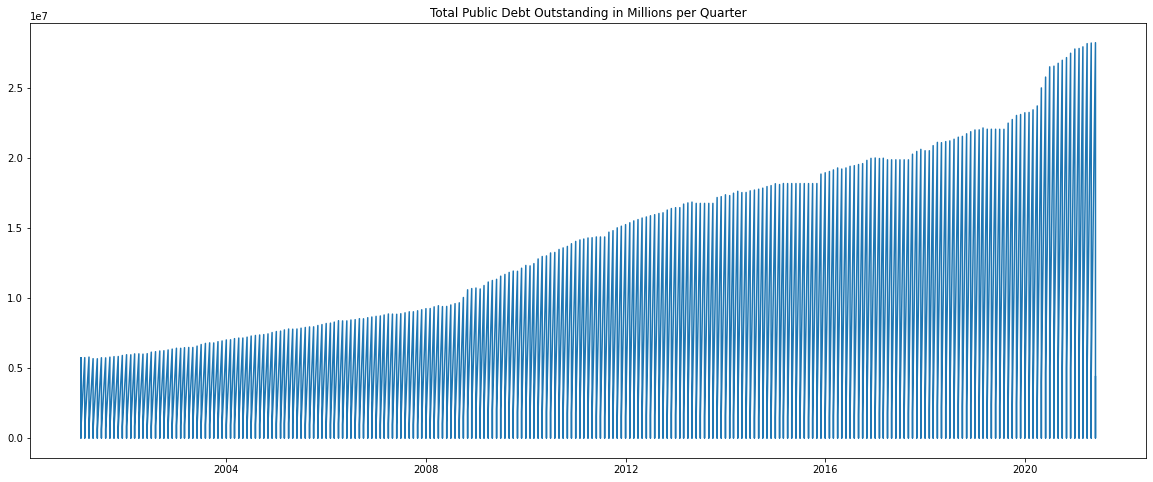

In [68]:
x = debt_three['Record_Date']
y = debt_three['Total_Public_Debt_OutstandingM']
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(x, y)
ax.set_title('Total Public Debt Outstanding in Millions per Quarter')
#graph created using the debt 3 df, 

Text(0.5, 1.0, 'Total Public Debt Outstanding in Millions per Quarter')

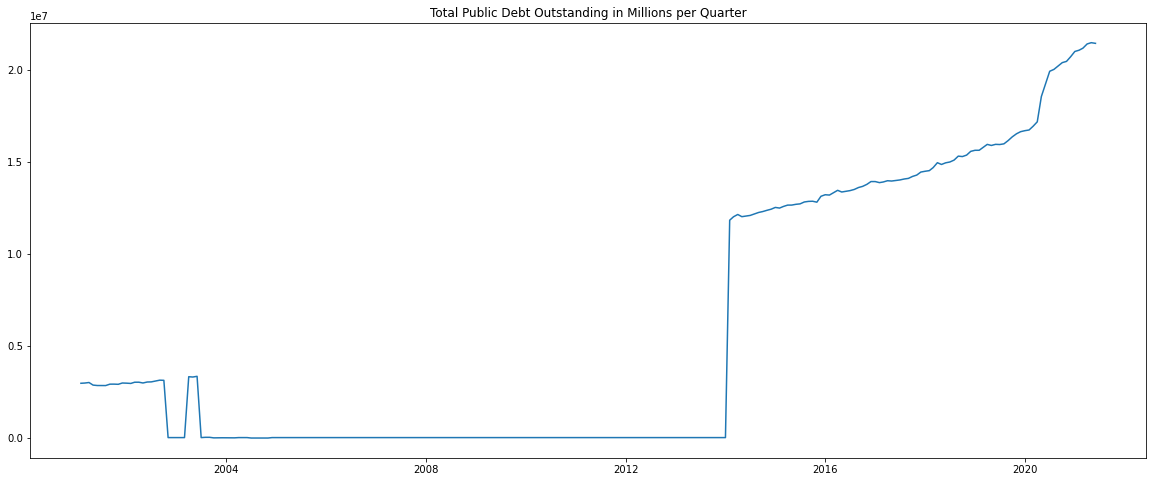

In [69]:
x = rng #beggining of recorded data to current, taken from record date column
y = TPDO[::-1] #reversed data information to match the rng index
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(x, y)
ax.set_title('Total Public Debt Outstanding in Millions per Quarter')

#final graph messed up due to data inconsistently having data at either 15 or 16 intervals


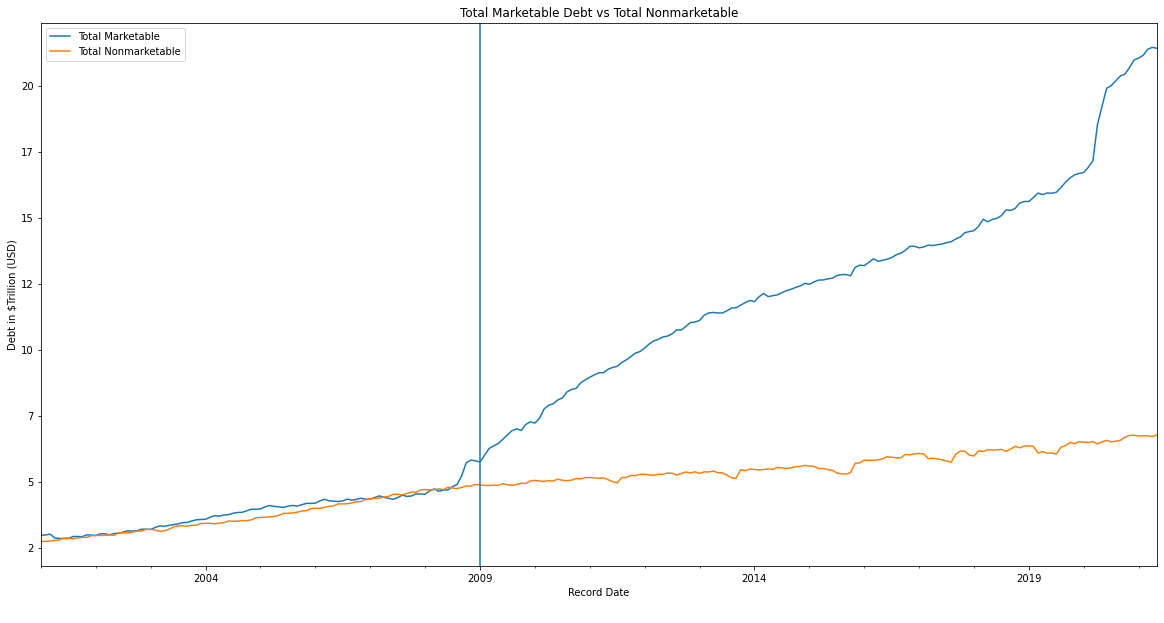

In [155]:

ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Marketable"].Total_Public_Debt_OutstandingM.plot(label="Total Marketable")

debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")["Security_Type_Description"]
                                 == "Total Nonmarketable"].Total_Public_Debt_OutstandingM.plot(label="Total Nonmarketable")

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))


plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Total Nonmarketable")
plt.xlabel("Record Date")
plt.axvline(x="2009-01-01")
plt.annotate("Hello", xy = ("2009-01-31", 2000))
# ax.annotate("Hello", xy = (debt_df.index[2222], debt_df["Total_Public_Debt_OutstandingM"][2222]), xycoords = 'data', xytext = (0,100), textcoords='offset points', arrowprops=dict(arrowstyle='->'), ha='center')

plt.legend() 



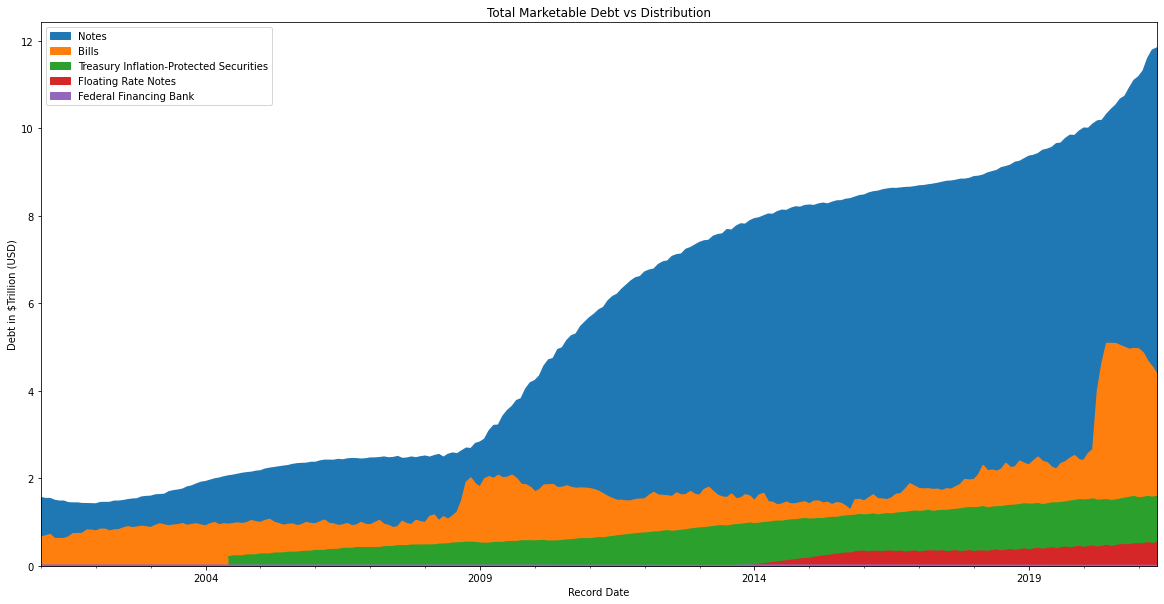

In [109]:

#Total Marketable Graph

#Total Marketable Debt
# ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Type_Description"] == "Total Marketable"].Total_Public_Debt_OutstandingM.plot(label="Total Marketable")


#Class Descriptions
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Total_Public_Debt_OutstandingM.plot.area(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Total_Public_Debt_OutstandingM.plot.area(label="Bills")   
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Total_Public_Debt_OutstandingM.plot.area(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Total_Public_Debt_OutstandingM.plot.area(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Total_Public_Debt_OutstandingM.plot.area(label="Federal Financing Bank")



#Labels    
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Distribution")
plt.xlabel("Record Date")


plt.legend()    

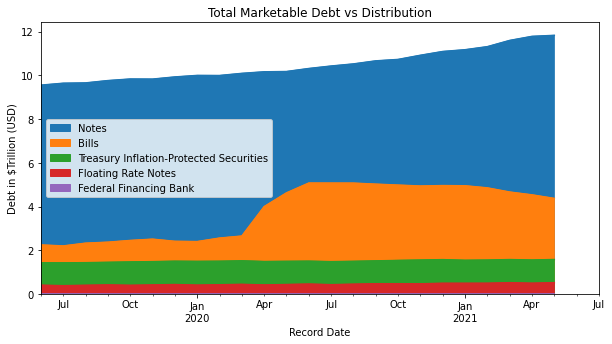

In [72]:
#Total Marketable Graph

#Total Marketable Debt
# ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Type_Description"] == "Total Marketable"].Total_Public_Debt_OutstandingM.plot(label="Total Marketable")


#Class Descriptions
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Total_Public_Debt_OutstandingM.plot.area(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Total_Public_Debt_OutstandingM.plot.area(label="Bills")   
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Total_Public_Debt_OutstandingM.plot.area(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Total_Public_Debt_OutstandingM.plot.area(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Total_Public_Debt_OutstandingM.plot.area(label="Federal Financing Bank")



#Labels    
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Distribution")
plt.xlabel("Record Date")
plt.xlim("2019-06-01", "2021-07-31")


plt.legend() 

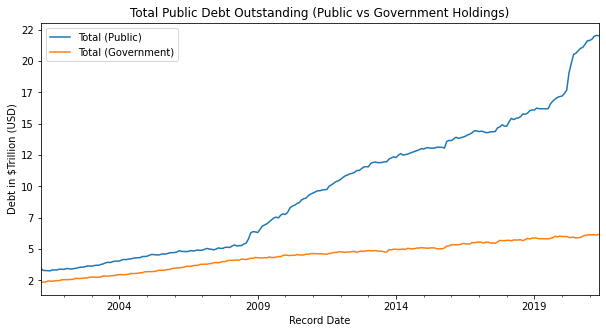

In [73]:
#Total Public Debt Outstanding

ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Public Debt Outstanding"].Debt_Held_by_the_PublicM.plot(label="Total (Public)")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Public Debt Outstanding"].Intragovernmental_HoldingsM.plot(label="Total (Government)")


ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Public Debt Outstanding (Public vs Government Holdings)")
plt.xlabel("Record Date")

plt.legend()   

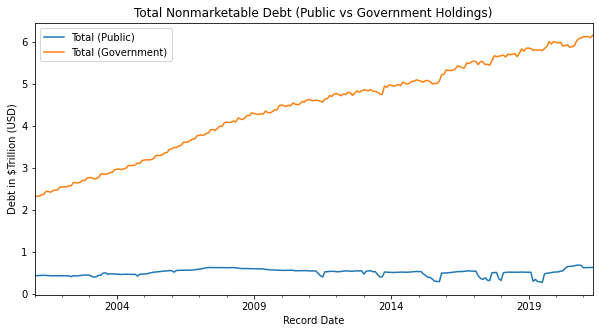

In [74]:
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Nonmarketable"].Debt_Held_by_the_PublicM.plot(label="Total (Public)")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Nonmarketable"].Intragovernmental_HoldingsM.plot(label="Total (Government)")

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Nonmarketable Debt (Public vs Government Holdings)")
plt.xlabel("Record Date")

plt.legend()

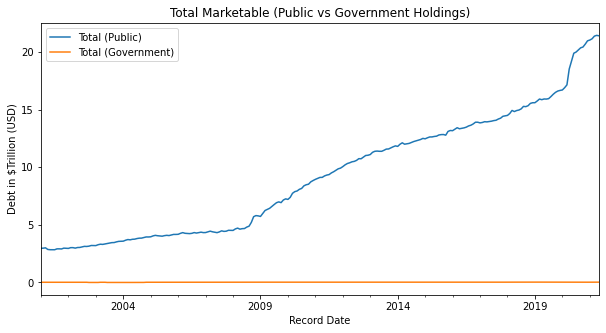

In [75]:
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Marketable"].Debt_Held_by_the_PublicM.plot(label="Total (Public)")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Marketable"].Intragovernmental_HoldingsM.plot(label="Total (Government)")

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable (Public vs Government Holdings)")
plt.xlabel("Record Date")

plt.legend()

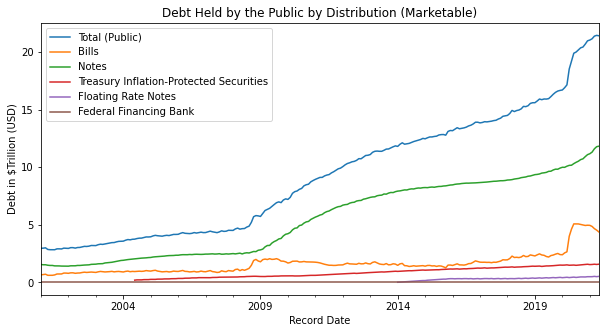

In [76]:

#Debt Held by the Public Graph
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Type_Description"] == "Total Marketable"].Debt_Held_by_the_PublicM.plot(label="Total (Public)")

#Class Descriptions    
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Debt_Held_by_the_PublicM.plot(label="Bills")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Debt_Held_by_the_PublicM.plot(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Debt_Held_by_the_PublicM.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Debt_Held_by_the_PublicM.plot(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Debt_Held_by_the_PublicM.plot(label="Federal Financing Bank")



ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Debt Held by the Public by Distribution (Marketable)")
plt.xlabel("Record Date")

plt.legend()

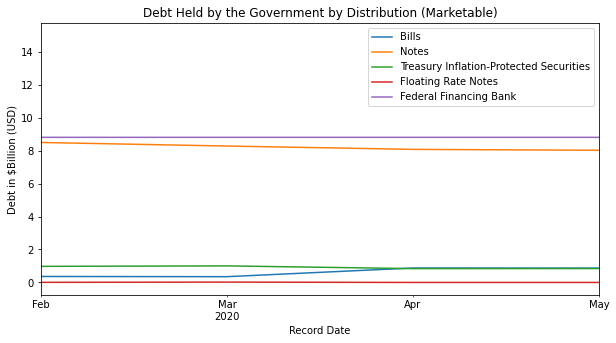

In [77]:
# #Debt Held by the Government Graph
# ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Type_Description"] == "Total Marketable"].Intragovernmental_HoldingsM.plot(label="Total (Government)")

#Class Descriptions    
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Intragovernmental_HoldingsM.plot(label="Bills")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Intragovernmental_HoldingsM.plot(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Intragovernmental_HoldingsM.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Intragovernmental_HoldingsM.plot(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Intragovernmental_HoldingsM.plot(label="Federal Financing Bank")


#Labels
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
plt.rcParams['figure.figsize'] = (20,10)

plt.ylabel("Debt in $Billion (USD)")
plt.title("Debt Held by the Government by Distribution (Marketable)")
plt.xlabel("Record Date")
plt.xlim("2020-02-01", "2020-05-01")

plt.legend()


In [78]:
debt_df.plot.bar(x="" )

KeyError: ''

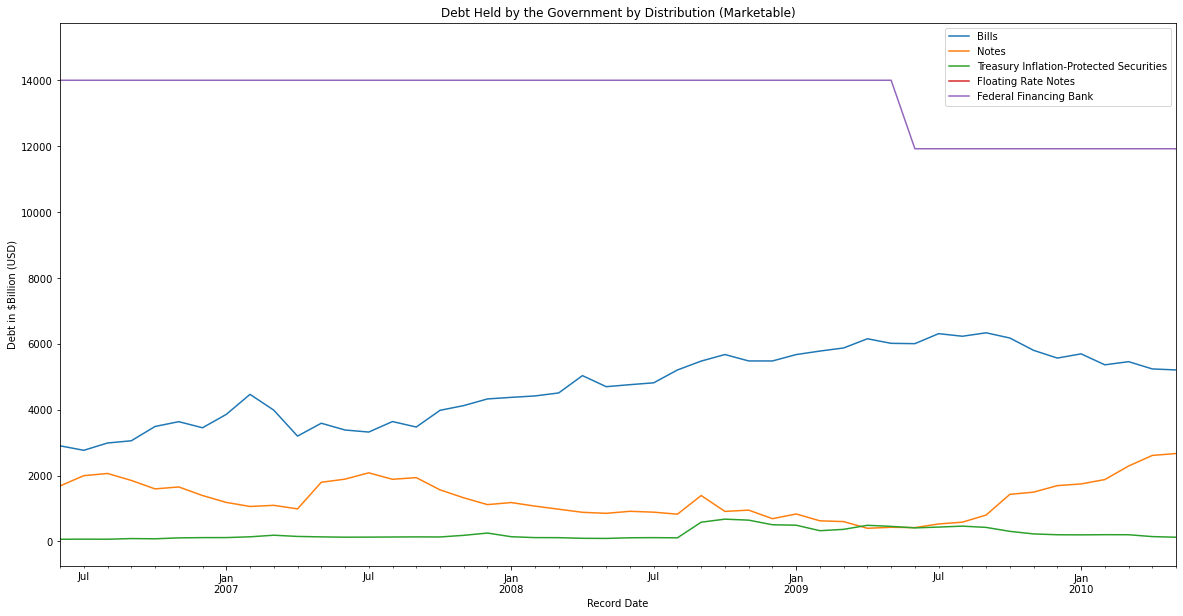

In [ ]:
#Debt Held by the Government Graph
# ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Type_Description"] == "Total Marketable"].Intragovernmental_HoldingsM.plot(label="Total (Government)")

#Class Descriptions    
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Intragovernmental_HoldingsM.plot(label="Bills")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Intragovernmental_HoldingsM.plot(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Intragovernmental_HoldingsM.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Intragovernmental_HoldingsM.plot(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Intragovernmental_HoldingsM.plot(label="Federal Financing Bank")


#Labels
plt.rcParams['figure.figsize'] = (20,10)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("Debt in $Billion (USD)")
plt.title("Debt Held by the Government by Distribution (Marketable)")
plt.xlabel("Record Date")
plt.xlim("2006-06-01", "2010-05-31")

plt.legend()

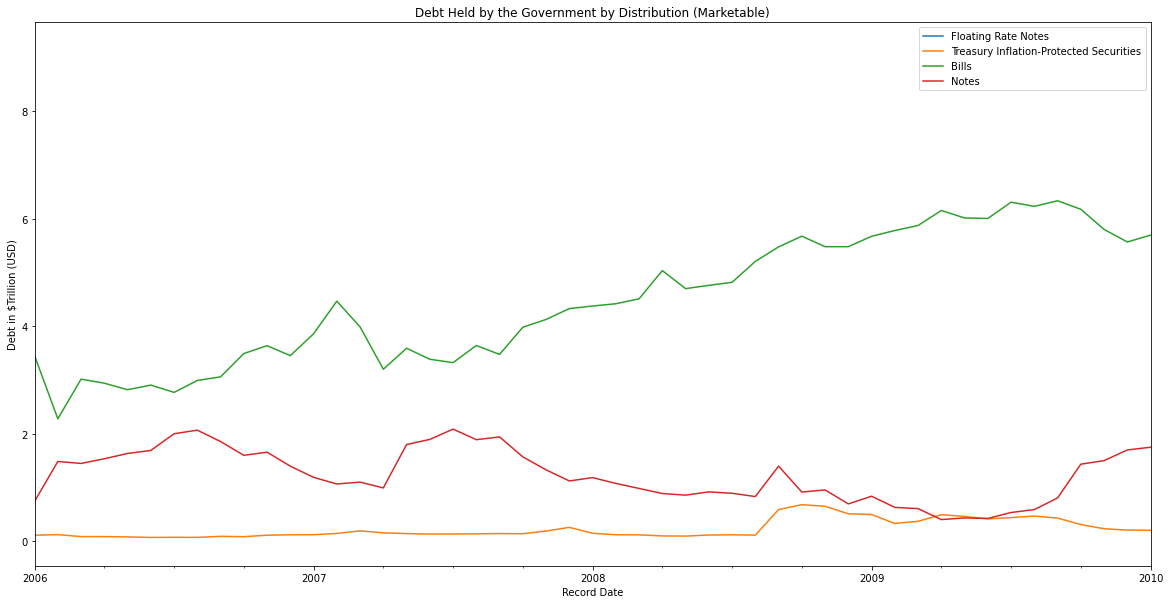

In [167]:
#Debt Held by the Government Graph
# ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Type_Description"] == "Total Marketable"].Intragovernmental_HoldingsM.plot.area(label="Total (Government)")

#Class Descriptions
# ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Federal Financing Bank"].Intragovernmental_HoldingsM.plot(label="Federal Financing Bank")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Intragovernmental_HoldingsM.plot(label="Floating Rate Notes") 
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Intragovernmental_HoldingsM.plot(label="Treasury Inflation-Protected Securities")
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Intragovernmental_HoldingsM.plot(label="Bills")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Intragovernmental_HoldingsM.plot(label="Notes")





#Labels
plt.rcParams['figure.figsize'] = (20,10)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Debt Held by the Government by Distribution (Marketable)")
plt.xlabel("Record Date")
plt.xlim("2006-01-01", "2010-01-01")

plt.legend()

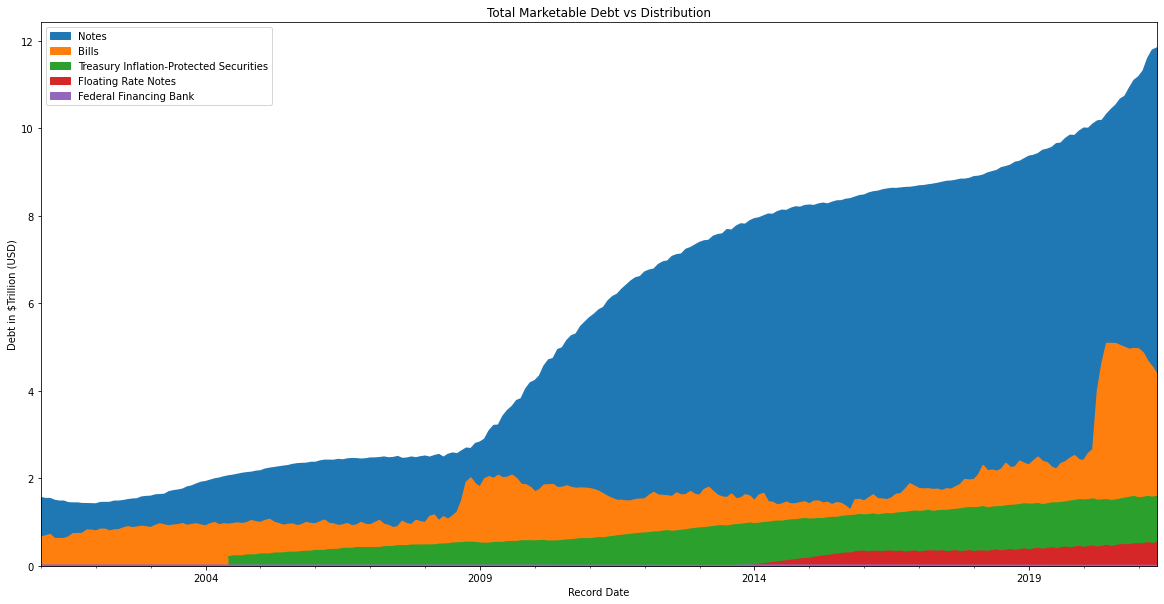

In [ ]:
#Total Marketable Graph

#Total Marketable Debt
# ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Type_Description"] == "Total Marketable"].Total_Public_Debt_OutstandingM.plot(label="Total Marketable")


#Class Descriptions
ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Notes"].Total_Public_Debt_OutstandingM.plot.area(label="Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Bills"].Total_Public_Debt_OutstandingM.plot.area(label="Bills")   
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Total_Public_Debt_OutstandingM.plot.area(label="Treasury Inflation-Protected Securities")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Floating Rate Notes"].Total_Public_Debt_OutstandingM.plot.area(label="Floating Rate Notes")
debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
    "Security_Class_Description"] == "Federal Financing Bank"].Total_Public_Debt_OutstandingM.plot.area(label="Federal Financing Bank")



#Labels    
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Distribution")
plt.xlabel("Record Date")
# plt.xlim("2007-01-01", "2007-06-01")

plt.legend()  

ConversionError: Failed to convert value(s) to axis units: array([<AxesSubplot:xlabel='Record_Date'>], dtype=object)

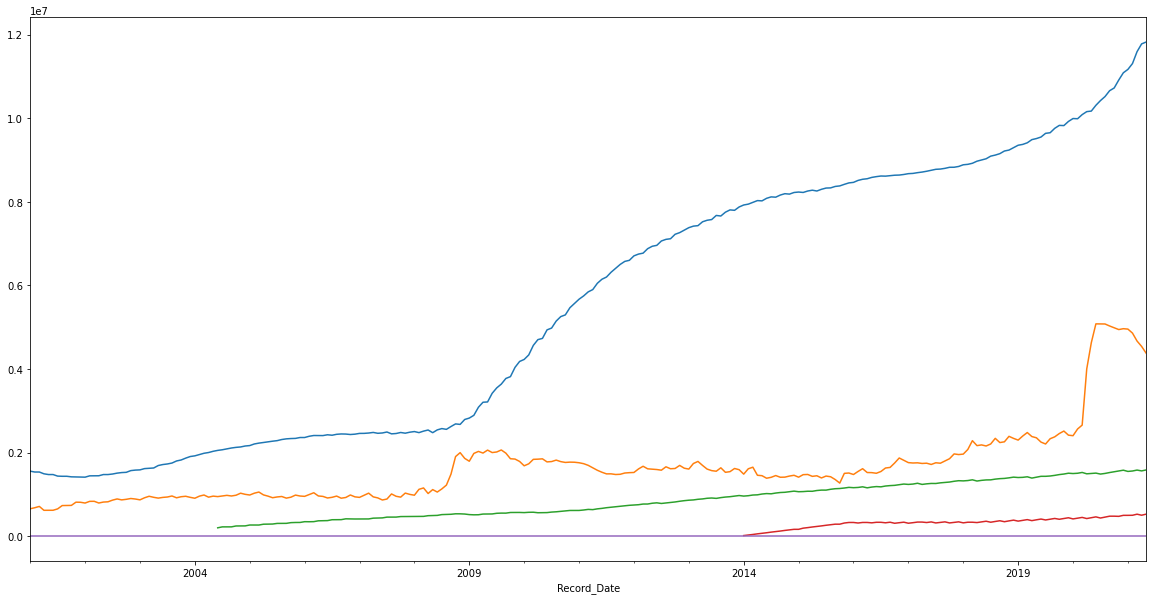

In [ ]:
# #Total Marketable Graph

# #Total Marketable Debt
# # ax = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
# #     "Security_Type_Description"] == "Total Marketable"].Total_Public_Debt_OutstandingM.plot(label="Total Marketable")


# #Debt Held by Public
# ax1 = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Notes"].Debt_Held_by_the_PublicM.plot(label="Notes")
# ax2 = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Bills"].Debt_Held_by_the_PublicM.plot(label="Bills")   
# ax3 = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Debt_Held_by_the_PublicM.plot(label="Treasury Inflation-Protected Securities")
# ax4 = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Floating Rate Notes"].Debt_Held_by_the_PublicM.plot(label="Floating Rate Notes")
# ax5 = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Federal Financing Bank"].Debt_Held_by_the_PublicM.plot(label="Federal Financing Bank")

# plt.plot(ax1, ax2, ax3, ax4, ax5)

# #Debt Held by Government
# plt.subplot(2, 2, 1)
# ax6 = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Notes"].Intragovernmental_HoldingsM.plot(label="Notes")
# ax7 = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Bills"].Intragovernmental_HoldingsM.plot(label="Bills")   
# ax8 = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Treasury Inflation-Protected Securities"].Intragovernmental_HoldingsM.plot(label="Treasury Inflation-Protected Securities")
# ax9 = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Floating Rate Notes"].Intragovernmental_HoldingsM.plot(label="Floating Rate Notes")
# ax10 = debt_df.set_index("Record_Date")[debt_df.set_index("Record_Date")[
#     "Security_Class_Description"] == "Federal Financing Bank"].Intragovernmental_HoldingsM.plot(label="Federal Financing Bank")



# #Labels    
# ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
# plt.ylabel("Debt in $Trillion (USD)")
# plt.title("Total Marketable Debt vs Distribution")
# plt.xlabel("Record Date")
# plt.xlim("2008-01-01", "2008-06-01")
# plt.ylim

# plt.legend()  

No Longer needed Graphs